In [1]:
# import all required libraries. 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import sys
import math
from scipy.stats import stats, skew, kurtosis, iqr, norm 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

# 1. Import the required libraries and load the training and testing dataset

In [2]:
#1. Import the required libraries and load the training and testing dataset 
xtrain = pd.read_csv(r'C:\Users\Dell\Desktop\MidProj1\data\train.csv')
xtest = pd.read_csv(r'C:\Users\Dell\Desktop\MidProj1\data\test.csv')
ytrain = pd.read_csv(r'C:\Users\Dell\Desktop\MidProj1\data\train_label.csv',names = ['Total_Booking'])
ytest = pd.read_csv(r'C:\Users\Dell\Desktop\MidProj1\data\test_label.csv',names = ['Total_Booking'])

# 2. Analyze the dataset and write your observations

Actually No missing Values Header Not given

In [3]:
#2 a. Check the shape of the training and testing set
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


In [4]:
#2 b. Print the data types of each column
print('xtrain')
print(xtrain.dtypes,end='\n\n')
print('ytrain')
print(ytrain.dtypes,end='\n\n')
print('xtest')
print(xtest.dtypes,end='\n\n')
print('ytest')
print(ytest.dtypes,end='\n\n')

xtrain
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

ytrain
Total_Booking    int64
dtype: object

xtest
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

ytest
Total_Booking    int64
dtype: object



# 3. Perform Feature Engineering:

In [5]:
#3 a. Create new columns date, hour, weekDay, month from datetime column
xtrain.datetime = xtrain.datetime.astype('datetime64')
xtest.datetime = xtest.datetime.astype('datetime64')

In [6]:
xtrain['Date'] = xtrain.datetime.dt.date
xtrain['Hour'] = xtrain.datetime.dt.hour
xtrain['WeekDay'] = xtrain.datetime.dt.day_name()
xtrain['Month'] = xtrain.datetime.dt.month_name()

In [7]:
xtest['Date'] = xtest.datetime.dt.date
xtest['Hour'] = xtest.datetime.dt.hour
xtest['WeekDay'] = xtest.datetime.dt.day_name()
xtest['Month'] = xtest.datetime.dt.month_name()

In [8]:
#3 b. Coerce the datatype of season, holiday, workingday, and weather to category
xtrain.season = xtrain.season.astype('category')
xtrain.holiday = xtrain.holiday.astype('category')
xtrain.workingday = xtrain.workingday.astype('category')
xtrain.weather = xtrain.weather.astype('category')

xtest.season = xtest.season.astype('category')
xtest.holiday = xtest.holiday.astype('category')
xtest.workingday = xtest.workingday.astype('category')
xtest.weather = xtest.weather.astype('category')

In [9]:
xtrain.Date = xtrain.Date.astype('category')
xtrain.weather = xtrain.weather.astype('category')
xtrain.WeekDay = xtrain.WeekDay.astype('category')
xtrain.Month = xtrain.Month.astype('category')
xtrain.Hour = xtrain.Hour.astype('category')

In [10]:
xtest.Date = xtest.Date.astype('category')
xtest.weather = xtest.weather.astype('category')
xtest.WeekDay = xtest.WeekDay.astype('category')
xtest.Month = xtest.Month.astype('category')
xtest.Hour = xtest.Hour.astype('category')

In [11]:
dfx = pd.concat([xtrain,xtest], axis = 0)
dfy = pd.concat([ytrain,ytest], axis = 0)
dffull = pd.concat([dfx,dfy], axis = 1)
# dffull.info()

In [12]:
#3 c. Drop the datetime column as we have already extracted useful features from it
xtrain.drop('datetime',axis = 1, inplace = True)
xtest.drop('datetime',axis = 1, inplace = True)

In [13]:
# To obtain Whole data set
dfx = pd.concat([xtrain,xtest], axis = 0)
dfy = pd.concat([ytrain,ytest], axis = 0)
dfall = pd.concat([dfx,dfy], axis = 1)
# dfall.info()

In [14]:
dfall.Date = dfall.Date.astype('category')
dfall.weather = dfall.weather.astype('category')
dfall.WeekDay = dfall.WeekDay.astype('category')
dfall.Month = dfall.Month.astype('category')
dfall.Hour = dfall.Hour.astype('category')
# dfall.info()

In [15]:
dfall.describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,WeekDay,Month,Total_Booking
count,10886,10886.0,10886.0,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886,10886.0,10886,10886,10886.000000
unique,4,2.0,2.0,4,NaN,NaN,NaN,NaN,456,24.0,7,12,NaN
top,Winter,0.0,1.0,Clear + Few clouds,NaN,NaN,NaN,NaN,2012-12-19 00:00:00,23.0,Saturday,May,NaN
freq,2734,10575.0,7412.0,7192,NaN,NaN,NaN,NaN,24,456.0,1584,912,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,NaN,NaN,NaN,NaN,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,NaN,NaN,NaN,NaN,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,NaN,NaN,NaN,NaN,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,NaN,NaN,NaN,NaN,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,NaN,NaN,NaN,NaN,284.000000


In [16]:
# 2 c. Check the missing values present in the dataset
dfall.isna().sum()
dfall.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Date             0
Hour             0
WeekDay          0
Month            0
Total_Booking    0
dtype: int64

In [17]:
dfall.shape

(10886, 13)

# 4. Perform Outlier Analysis:

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

tr_all = pd.concat([xtrain,ytrain], axis = 1)

col_n = ['temp','atemp','humidity','windspeed','Total_Booking']
col_c = ['season','holiday','workingday','weather','Date','Hour','WeekDay','Month']
col_a = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','WeekDay','Month','Total_Booking']

In [19]:
# #4 a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference
# plt.figure(figsize=(16,10))
# for i in col_n:
#     fig=px.box(tr_all[i],points=None,category_orders=None)
#     fig.show()

Inference:
1. Outlier noticed in Wind Speed & Total booking Columns
2. Checking for any correlation between these two outliers Based on various quantiles. Seems negatively correlated. But No Satistics

<AxesSubplot:xlabel='windspeed', ylabel='Total_Booking'>

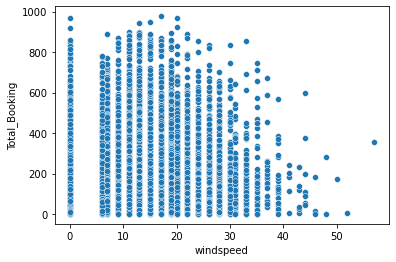

In [20]:
sns.scatterplot(x=tr_all.windspeed,y=tr_all.Total_Booking)

In [21]:
from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()
d1 = pd.get_dummies(dffull)
d1.drop(['datetime','Date'],axis=1,inplace = True)
d2 = d1[(d1.Total_Booking>d1.Total_Booking.quantile(0.7))]#|(d1.Total_Booking<d1.Total_Booking.quantile(0.001))]
dffull_ss = ss.fit_transform(d2)
d2.corr()

,temp,atemp,humidity,windspeed,Total_Booking,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
temp,1.000000,0.966150,-0.192647,-0.002047,0.125362,0.628566,-0.349439,0.069023,-0.510790,-0.065725,...,-0.376292,-0.257205,-0.193692,0.436913,0.206860,-0.163242,0.007640,-0.356533,-0.089515,0.145389
atemp,0.966150,1.000000,-0.156436,-0.021980,0.120956,0.591144,-0.344548,0.084496,-0.489896,-0.064802,...,-0.367676,-0.253005,-0.197371,0.417825,0.200069,-0.157812,0.027485,-0.351936,-0.070871,0.160851
humidity,-0.192647,-0.156436,1.000000,-0.248738,-0.100333,0.040031,-0.057404,-0.136598,0.139399,-0.043514,...,0.152252,-0.015939,-0.041495,-0.098578,-0.073762,-0.040666,0.074771,-0.019767,0.089544,0.139059
windspeed,-0.002047,-0.021980,-0.248738,1.000000,0.037386,-0.085602,0.071618,0.091317,-0.052507,0.026097,...,-0.077725,-0.017392,0.041512,-0.072890,0.011694,0.083800,-0.009070,0.028625,-0.035730,-0.039902
Total_Booking,0.125362,0.120956,-0.100333,0.037386,1.000000,0.038608,-0.089072,0.032008,-0.013759,0.025485,...,-0.058132,-0.075099,-0.048386,-0.024050,0.038913,-0.035177,0.006004,-0.037426,0.064279,0.066156
season_Fall,0.628566,0.591144,0.040031,-0.085602,0.038608,1.000000,-0.241260,-0.469684,-0.423103,-0.037798,...,-0.200157,-0.124133,-0.093860,0.512652,-0.260253,-0.174225,-0.242472,-0.217470,-0.241260,0.485260
season_Spring,-0.349439,-0.344548,-0.057404,0.071618,-0.089072,-0.241260,1.000000,-0.220592,-0.198715,0.059862,...,-0.094006,0.514520,0.389042,-0.123682,-0.122231,0.722146,-0.113880,-0.102137,-0.113311,-0.117074
season_Summer,0.069023,0.084496,-0.136598,0.091317,0.032008,-0.469684,-0.220592,1.000000,-0.386858,0.050595,...,-0.183011,-0.113499,-0.085820,-0.240784,0.554102,-0.159300,0.516245,-0.198840,-0.220592,-0.227919
season_Winter,-0.510790,-0.489896,0.139399,-0.052507,-0.013759,-0.423103,-0.198715,-0.386858,1.000000,-0.053447,...,0.473070,-0.102243,-0.077309,-0.216904,-0.214358,-0.143501,-0.199713,0.513988,0.570216,-0.205315
holiday_0,-0.065725,-0.064802,-0.043514,0.026097,0.025485,-0.037798,0.059862,0.050595,-0.053447,1.000000,...,0.049664,0.030800,0.023289,-0.082981,0.064575,0.043229,0.060163,-0.048450,-0.075416,-0.035589


Inference in the markdown cell
1. temp has very good positive correlation with atemp. Hence either of them can be removed to avoid multicolinearlity issue.
2. Humdity have negative correlation with windspeed and Total Booking. However it is not much significant, the absolute value is less than 0.5
3. Temp & ATemp have positive correlation with windspeed and Total Booking. However it is not much significant, the absolute value is less than 0.5
4. The outliers found only in windspeed feature. Also it's significant correlation with target Value has to be studied for better modelling

<AxesSubplot:xlabel='windspeed', ylabel='Total_Booking'>

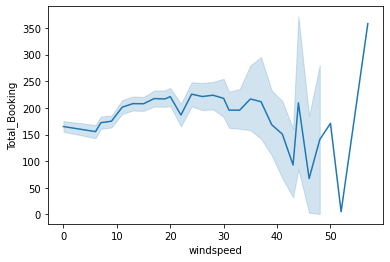

In [22]:
sns.lineplot(x=tr_all.windspeed,y=tr_all.Total_Booking)

In [23]:
# # EDA 1 - Univariate Analysis: Checking count distributions of each features

# for i in col_a:
#     print(i)
#     plt.figure(figsize=(10,8))
#     sns.countplot(x=tr_all[i])
#     plt.show()

In [24]:
# #EDA 2 - Univariate Analysis: Count Distributions in Values
# for i in col_n:
#     print(i)
#     print(tr_all[i].value_counts())
#     print(tr_all[i].mean())
#     print(tr_all[i].std())
#     print(tr_all[i].median())
#     print()

In [25]:
# for i in col_c:
#     print(i)
#     print(tr_all[i].value_counts())
#     print()

In [26]:
# #EDA 3 Line plot of Numeric Features
# for i in col_n:
#     plt.figure(figsize=(16,10))
#     print(i)
#     tr_all[i].plot(kind='line')

In [27]:
tr_all.corr()

,temp,atemp,humidity,windspeed,Total_Booking
temp,1.000000,0.984035,-0.066419,-0.027824,0.397456
atemp,0.984035,1.000000,-0.044206,-0.068911,0.392754
humidity,-0.066419,-0.044206,1.000000,-0.320346,-0.307982
windspeed,-0.027824,-0.068911,-0.320346,1.000000,0.092090
Total_Booking,0.397456,0.392754,-0.307982,0.092090,1.000000


In [28]:
# #6 b. Visualize total_booking vs Categorical ['season','holiday', 'weather', 'Hour', 'WeekDay']

# col_c1=['holiday', 'weather', 'Hour','Month', 'WeekDay'] # Final Categorical Season Removed
# col_n1 = ['atemp', 'humidity', 'windspeed',]# Final Numeric
# for i in col_c1:
#     fig=px.scatter(tr_all, x=i, y='Total_Booking', color='atemp', hover_name = tr_all.index, size_max=40)
#     fig.show()

Inference
1. Season Have not much influence
2. Holiday favours
3. Heavy Rain & Thunder severely affects Weather Clear & Cloudy favours
4. Peak Hours are noticed 7 - 20 (8,18,17)
5. month Jan & Feb found low always
6. Sat & Sun low

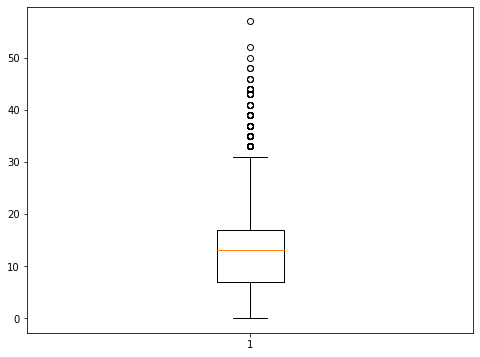

In [29]:
# 4 b. Remove the outliers present in the dataset - Elimination of Outliers : In 'windspeed'
plt.figure(figsize=(8,6))
bx1 = plt.boxplot(tr_all.windspeed)
plt.show()

In [30]:
ol1 = bx1['fliers'][0]
ol1a=ol1.get_data()[1]
# ol1a=ol1a.reshape(-1,1)
len(ol1a)

182

In [31]:
#Eliminating Outliers using Zscore Value matching the BoxPlot
z1 = np.abs(stats.zscore(tr_all.windspeed))
len(tr_all[(z1>2.3)])

182

In [32]:
tr_ol = tr_all[(z1<2.3)]

In [33]:
tr_all['Total_Booking'][(z1>2.3)].mean()

192.0989010989011

In [34]:
#Training Data without outlier in the feature columns
# tr_ol

In [35]:
# #Cross Verifying the present of Outliers
# plt.figure(figsize=(8,6))
# bx1 = plt.boxplot(tr_ol.windspeed)
# plt.show()

# 5. Perform Correlation Analysis:

In [36]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         10886 non-null  category
 1   holiday        10886 non-null  category
 2   workingday     10886 non-null  category
 3   weather        10886 non-null  category
 4   temp           10886 non-null  float64 
 5   atemp          10886 non-null  float64 
 6   humidity       10886 non-null  int64   
 7   windspeed      10886 non-null  float64 
 8   Date           10886 non-null  category
 9   Hour           10886 non-null  category
 10  WeekDay        10886 non-null  category
 11  Month          10886 non-null  category
 12  Total_Booking  10886 non-null  int64   
dtypes: category(8), float64(3), int64(2)
memory usage: 631.7 KB


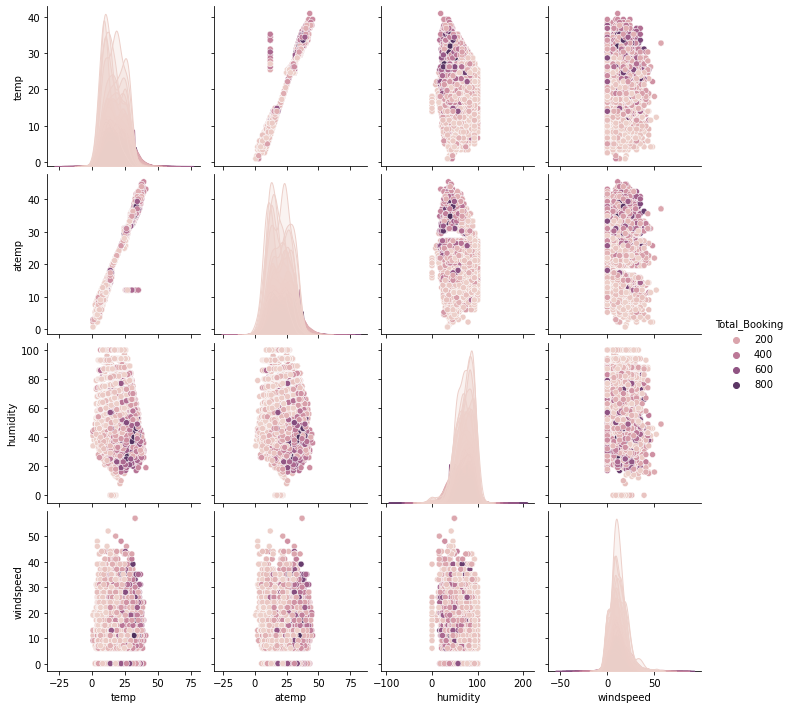

In [37]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(dfall[col_n],hue='Total_Booking',)
plt.show()

In [38]:
#5 a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"]
tr_ol.corr()

,temp,atemp,humidity,windspeed,Total_Booking
temp,1.000000,0.984131,-0.074168,-0.010232,0.394338
atemp,0.984131,1.000000,-0.053346,-0.049286,0.389535
humidity,-0.074168,-0.053346,1.000000,-0.301306,-0.314783
windspeed,-0.010232,-0.049286,-0.301306,1.000000,0.104158
Total_Booking,0.394338,0.389535,-0.314783,0.104158,1.000000


<AxesSubplot:>

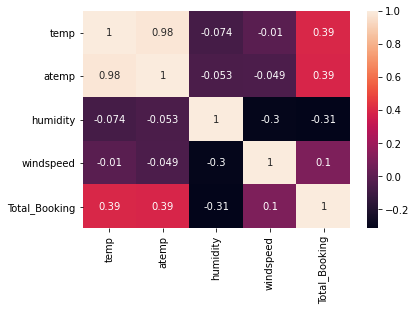

In [39]:
sns.heatmap(tr_ol.corr(),annot=True)

Inference
1. temp has very good positive correlation with atemp. Hence either of them can be removed to avoid multicolinearlity issue.
2. Humdity have negative correlation with windspeed and Total Booking. However it is not much significant, the absolute value is less than 0.5
3. Temp & ATemp have positive correlation with windspeed and Total Booking. However it is not much significant, the absolute value is less than 0.5

In [40]:
# from pandas_profiling import ProfileReport
# r1 = ProfileReport(tr_all)
# r1.to_file('pf_r1.html')

In [41]:
# import sweetviz as sv
# viz1 = sv.analyze(tr_all)
# viz1.show_html('sv_r1.html')

# 6. Perform Data Visualization:

In [42]:
# #6 a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well 

# for i in col_n:
#     plt.figure(figsize=(16,12))
#     sns.displot(tr_ol[i], kde=True, color = 'blue', bins=100 )
#     plt.show()

In [43]:
# for i in col_n:
#     plt.figure(figsize=(12,8))
#     sns.distplot(tr_ol[i], kde=True, color = 'green', bins=100 )
#     plt.show()

In [44]:
# cols = ['temp', 'humidity','windspeed']
# for i in cols:
#     plt.figure(figsize=(16,12))
#     sns.scatterplot(x=tr_ol[i],y = tr_ol.Total_Booking )
#     plt.show()

In [45]:
tr_ol.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Date', 'Hour', 'WeekDay', 'Month',
       'Total_Booking'],
      dtype='object')

⨂ To Repeat for dfall data

In [46]:
# #6 b. Visualize total_booking vs Categorical ['season','holiday', 'weather', 'Hour', 'WeekDay']

# col_c1=['Month','holiday', 'weather', 'Hour', 'WeekDay'] # Final Categorical
# col_n1 = ['atemp', 'humidity', 'windspeed',]# Final Numeric
# for i in col_c1:
#     fig=px.scatter(tr_ol, x=i, y='Total_Booking', color='temp', hover_name = tr_ol.index, size_max=40)
#     fig.show()

Inference
1. Understood the holiday and working day are interdependent. Also holiday captures more variations towards target. Hence working day can be removed.
2. simillarly season and month are highly correlated. Having more coverage of variancein month, season can be removed for easy computancy & Classification.
3. Date is being continous and no recurrance. Hence it can also be eliminated since we have day and hour features seperatly.
4. atemp retained, temp can be removed having less coverage of variance

In [47]:
# #6 c. Use Histograms to plot all the continuous variables present in the data

# for i in col_n1:
#     sns.histplot(tr_ol, x=i, y='Total_Booking')#, color='temp',hover_name=tr_cust.index, size_max=60)
#     plt.show()

In [48]:
# # Histogram Sum cols=['windspeed','humidity','temp', 'Date']

# for i in col_c1:
#     fig=px.histogram(tr_ol, x=i, y='Total_Booking', histfunc='avg', color='WeekDay',hover_name=tr_ol.index)
#     fig.show()

In [49]:
# # Histogram Sum cols=['windspeed','humidity','temp', 'Date']

# for i in col_c1:
#     fig=px.histogram(tr_ol, x=i, y='Total_Booking', histfunc='sum', color='WeekDay',hover_name=tr_ol.index)
#     fig.show()

In [50]:
# # Histogram Avg cols=['windspeed','humidity','temp', 'Date']

# for i in col_n1:
#     fig=px.histogram(tr_all, x=i, y='Total_Booking' , histfunc='avg', color='WeekDay',hover_name=tr_all.index)
#     fig.show()

In [51]:
# # Histogram Avg cols=['windspeed','humidity','temp', 'Date']

# for i in col_n1:
#     fig=px.histogram(tr_ol, x=i, y='Total_Booking' , histfunc='avg', color='WeekDay',hover_name=tr_ol.index)
#     fig.show()

In [52]:
# col_a1 = ['workingday','holiday','weather','temp','atemp']
# # Histogram Avg cols=['windspeed','humidity','temp', 'Date']

# for i in col_a1:
#     fig=px.histogram(tr_all, x=i, y='Total_Booking' , histfunc='avg', color='WeekDay',hover_name=tr_all.index)
#     fig.show()


Inference 
1. Understood the holiday and working day are interdependent. Also holiday captures more variations towards target. Hence workin day can be removed.
2. simillarly season and month are highly correlated months can be removed for easy computancy & Classification.
3. Date is being continous and no recurrance. Hence it can also be eliminated since we have day and hour features seperatly.
4. Windspeed Valid Outlier have negative impact on booking. Hence can be removed instead robust scaling can be done

In [53]:
# To Analyze Positive Factor and Negative Factors of Total Booking
q1 = dfall[(dfall.Total_Booking<dfall.Total_Booking.quantile(0.25))]
q3 = dfall[(dfall.Total_Booking>dfall.Total_Booking.quantile(0.75))]

In [54]:
# for i in col_a:
#     fig=px.histogram(q3, x=i, y='Total_Booking' , histfunc='sum', color='Hour',hover_name=q3.index)
#     fig.show()

In [55]:
# for i in col_a:
#     fig=px.histogram(q1, x=i, y='Total_Booking' , histfunc='sum', color='Hour')
#     fig.show()

# 7. Convert the categorical variables into one hot vector

# Feature selection & ONE HOT ENCODING

In [56]:
# tr_ol.info()

In [57]:
# 7. Convert the categorical variables into one hot vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
cols=['season', 'Hour', 'WeekDay','weather']  # Select Features
enc= ohe.fit_transform(tr_ol[cols])
tr_enc = pd.DataFrame(enc,index=tr_ol.index)
tr_enc.columns = ohe.get_feature_names(cols)

In [58]:
tr_f = pd.concat([tr_ol,tr_enc],axis=1)

In [59]:
col_d=['season', 'workingday', 'Hour', 'WeekDay', 'Month','weather','temp','Date']
tr_f.drop(col_d, axis=1, inplace = True)

In [60]:
tr_f.shape

(8526, 44)

In [61]:
tr_f.holiday=tr_f.holiday.astype('int64')

In [62]:
# Already the given data is in splited form only. No need for further spliting
trY = tr_f[['Total_Booking']]
trx = tr_f.drop('Total_Booking',axis=1)
# Interchanging the columns or Matching the column index
trX=trx.copy()
trX.drop('weather_ Heavy Rain + Thunderstorm ',axis=1,inplace = True)
trX.insert(42,'weather_ Heavy Rain + Thunderstorm ',trx['weather_ Heavy Rain + Thunderstorm '].values,allow_duplicates=True)

In [63]:
trX.shape

(8526, 43)

In [64]:
# sns.pairplot(tr_f,hue='Total_Booking',)
# plt.show()

# 8. Split your dataset for training and testing

# Data set 1: Given
1. Given: Data As per Project Split given predefined.

In [65]:
#  the Test data Shape Matching Adding OHE
ohe = OneHotEncoder(sparse=False)
cols=['season', 'Hour', 'WeekDay','weather'] # Select Features
enc= ohe.fit_transform(xtest[cols])
ts_enc = pd.DataFrame(enc,index=xtest.index)
ts_enc.columns = ohe.get_feature_names(cols)
ts_f = pd.concat([xtest,ts_enc],axis=1)
cols=['season', 'workingday', 'Hour', 'WeekDay', 'Month','weather','temp','Date']
tsX=ts_f.drop(cols,axis=1)
tsY = ytest

In [66]:
# print(trX.shape)
# print(tsX.shape)
# print(trY.shape)
# print(tsY.shape)

Adding Missed Columns in Test Data(tsX) Based on value counts understood that One feature got missed in OHE due to Zero Value

In [67]:
tsX.insert(42,'weather_ Heavy Rain + Thunderstorm ',tsX['weather_ Mist + Cloudy '].values)
tsX['weather_ Heavy Rain + Thunderstorm ']=0.0

In [68]:
# tsX.columns

In [69]:
# # As per Project given Split after without Outlier
# print(trX.shape)
# print(tsX.shape)
# print(trY.shape)
# print(tsY.shape)

In [70]:
# trX.columns

In [71]:
tsX.columns == trX.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# Data Set 2: Reshuffled
2. Reshuffled: Data reshuffled with outlier and features eliminated 

In [72]:
dfall.to_csv('CabBookAll.csv')

In [73]:
# plt.figure(figsize=(16,10))
# cols = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','WeekDay','Month']
# for i in cols:
#     fig=px.box(x=dfall[i],y=dfall.Total_Booking)
#     fig.show()

In [74]:
col_c1 = ['season', 'weather', 'Hour', 'WeekDay']
enc = pd.get_dummies(dfall[col_c1])
data_f = pd.concat([dfall,enc],axis=1)
col_d=['season', 'workingday', 'WeekDay','Hour', 'Month','weather','temp','Date']
data_f.drop(col_d,axis=1,inplace = True)
x = data_f.drop('Total_Booking',axis=1)
y = data_f[['Total_Booking']]

In [75]:
from sklearn.model_selection import train_test_split as tts
xtr,xts,ytr,yts = tts(x,y,test_size=0.3,random_state = 8)

In [76]:
# #Reshuffled Data with outliers
# print(xtr.shape)
# print(xts.shape)
# print(ytr.shape)
# print(yts.shape)

In [77]:
# r2 = ProfileReport(data_f)
# r2.to_file('PF_r2.html')

In [78]:
# import sweetviz as sv
# viz2 = sv.analyze(data_f)
# viz2.show_html('sv_r2.html')

# Data Set 3: Robust
3. Robust: Data from Reshuffled and Outlier Controled using Robust Scaler

In [79]:
from sklearn.preprocessing import RobustScaler, StandardScaler
rs = RobustScaler()
ss = StandardScaler()
xtr_rs = rs.fit_transform(xtr)
xts_rs = rs.transform(xts)

In [80]:
xtr_rs = pd.DataFrame(xtr_rs,columns = xtr.columns)
xts_rs = pd.DataFrame(xts_rs,columns = xts.columns)

In [81]:
#Robusted Data with controlled outliers
print(xtr_rs.shape)
print(xts_rs.shape)
print(ytr.shape)
print(yts.shape)

(7620, 43)
(3266, 43)
(7620, 1)
(3266, 1)


# Data set 4: Weather_Splited 
4. Weather_Splited: From Data 1: Given Weather feature splited to Weather 1 Weather 2

In [82]:
# No Use of splitting the combined weather columns
# tr_ol.weather.value_counts()

In [83]:
# x1 = tr_ol[(tr_ol['weather'] ==tr_ol.weather.value_counts().index[0])]
# x2 = tr_ol[(tr_ol['weather'] ==tr_ol.weather.value_counts().index[1])]
# x3 = tr_ol[(tr_ol['weather'] ==tr_ol.weather.value_counts().index[2])]
# x4 = tr_ol[(tr_ol['weather'] ==tr_ol.weather.value_counts().index[3])]
# x1a = x1.weather.str.split('+', expand = True)
# w1 = pd.concat([x1,x1a],axis = 1)
# x2a = x2.weather.str.split('+', expand = True)
# w2 = pd.concat([x2,x2a],axis = 1)
# x3a = x3.weather.str.split(',', expand=True)
# w3 = pd.concat([x3,x3a],axis = 1)
# x4a = x4.weather.str.split('+', expand=True)
# w4 = pd.concat([x4,x4a],axis = 1)

In [84]:
# tr_cust = pd.concat([w1,w2,w3,w4],axis = 0)
# tr_cust=tr_cust.rename({0:'Weather1',1:'Weather2'},axis=1)
# tr_cust.drop('weather',axis=1,inplace = True)
# tr_cust

# 9. Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [85]:
from sklearn.metrics import r2_score as r2s, mean_squared_log_error as msle, mean_squared_error as mse
X_train = trX
y_train = trY.Total_Booking
X_test = tsX
y_test = tsY.Total_Booking

In [86]:
from sklearn.ensemble import RandomForestRegressor
import math
rfc_m1 = RandomForestRegressor(n_jobs=-1, random_state= 8, verbose = 1)
rfc_m1.fit(X_train,y_train)
y_pred = rfc_m1.predict(X_test)
le1 = msle(y_test,y_pred)
r2_1=r2s(y_test,y_pred)
rmse_1 = math.sqrt(mse(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [87]:
pred_y = rfc_m1.predict(X_train)
r2_1a=r2s(y_train,pred_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [88]:
from sklearn.ensemble import AdaBoostRegressor
abr_m2 = AdaBoostRegressor(learning_rate = 0.1, n_estimators=180, random_state= 9)
abr_m2.fit(X_train,y_train)
y_pred = abr_m2.predict(X_test)
le2 = msle(y_test,y_pred)
r2_2=r2s(y_test,y_pred)
rmse_2 = math.sqrt(mse(y_test,y_pred))

In [89]:
pred_y = abr_m2.predict(X_train)
r2_2a=r2s(y_train,pred_y)

In [90]:
from sklearn.ensemble import BaggingRegressor
br_m3 = BaggingRegressor(random_state= 9, verbose = 4, n_jobs=-1)
br_m3.fit(X_train,y_train)
y_pred = br_m3.predict(X_test)
le3 = msle(y_test,y_pred)
r2_3=r2s(y_test,y_pred)
rmse_3 = math.sqrt(mse(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [91]:
pred_y = br_m3.predict(X_train)
r2_3a=r2s(y_train,pred_y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [92]:
from sklearn.svm import SVR
svr_m4 = SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_m4.fit(X_train,y_train)
y_pred = svr_m4.predict(X_test)
le4 = msle(y_test,y_pred)
r2_4=r2s(y_test,y_pred)
rmse_4 = math.sqrt(mse(y_test,y_pred))

In [93]:
pred_y = svr_m4.predict(X_train)
r2_4a=r2s(y_train,pred_y)

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knnr_m5 = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')
knnr_m5.fit(X_train,y_train)
y_pred = knnr_m5.predict(X_test)
le5 = msle(y_test,y_pred)
r2_5=r2s(y_test,y_pred)
rmse_5 = math.sqrt(mse(y_test,y_pred))

In [95]:
pred_y = knnr_m5.predict(X_train)
r2_5a=r2s(y_train,pred_y)

In [96]:
def f_feature_imp(model,X):
    dict_feat_imp = {
        'Feature': X.columns, 
        'Importance': model.feature_importances_
        }
    df_feature_imp=pd.DataFrame(dict_feat_imp)
    df_feature_imp.sort_values(by='Importance', 
                               ascending=False,
                               inplace=True)
    print("Feature Importances of given model: ", model)
    print(df_feature_imp.head(20))
f_feature_imp(rfc_m1,X_train)

Feature Importances of given model:  RandomForestRegressor(n_jobs=-1, random_state=8, verbose=1)
                            Feature  Importance
1                             atemp    0.210108
2                          humidity    0.108145
25                          Hour_17    0.097490
26                          Hour_18    0.079764
16                           Hour_8    0.056609
35                   WeekDay_Sunday    0.051953
34                 WeekDay_Saturday    0.047656
3                         windspeed    0.035617
27                          Hour_19    0.031157
5                     season_Spring    0.020673
15                           Hour_7    0.016816
10                           Hour_2    0.014742
9                            Hour_1    0.014681
11                           Hour_3    0.014341
24                          Hour_16    0.013687
12                           Hour_4    0.013264
8                            Hour_0    0.013046
13                           Hour_5    

In [97]:
f_feature_imp(abr_m2,X_train)

Feature Importances of given model:  AdaBoostRegressor(learning_rate=0.1, n_estimators=180, random_state=9)
             Feature  Importance
1              atemp    0.227015
25           Hour_17    0.192534
26           Hour_18    0.180588
2           humidity    0.152641
16            Hour_8    0.140261
5      season_Spring    0.024921
35    WeekDay_Sunday    0.017220
11            Hour_3    0.011107
7      season_Winter    0.010173
12            Hour_4    0.008399
10            Hour_2    0.007435
34  WeekDay_Saturday    0.007198
9             Hour_1    0.006128
4        season_Fall    0.004580
20           Hour_12    0.003522
36  WeekDay_Thursday    0.001481
13            Hour_5    0.001466
6      season_Summer    0.001290
15            Hour_7    0.001035
32    WeekDay_Friday    0.000650


# 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

In [98]:
# 0.2952362277434448 0.2952362277434448 0.2952362277434448 0.2952362277434448 0.2952362277434448
# 0.8330758531902885 0.3291665169319141 0.8145855979165308 0.566278575280626 0.28060825239575926
# 0.9734683269453747 0.3614882340130746 0.9621502963058903 0.5556108552488239 0.3710820179647215

In [99]:
model = ['RFC','AdaBoost','Bagging','SVR','KNNR']
RMSE = [rmse_1,rmse_2,rmse_3,rmse_4,rmse_5] 

In [100]:
RMSE

[73.29253189127093,
 146.92899490188333,
 77.24526627576691,
 160.85568036573497,
 152.15382265455253]

In [101]:
f_plt = pd.DataFrame({'Model':model,'RMSE':RMSE})

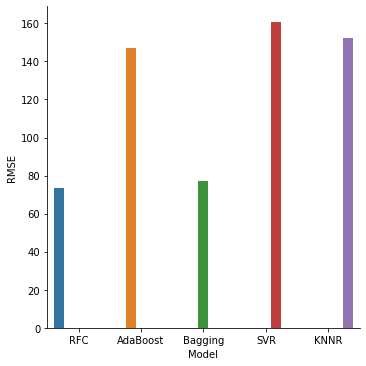

In [102]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# read a csv file
# df = pd.read_csv('f_plt.csv')
  
# point plot using hue attribute
# for colouring out points
# according to the sex
# sns.factorplot(x ='Model', y ='RMSE', hue = 'Model', data = f_plt,strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".)
sns.catplot(x ='Model', y ='RMSE', hue = 'Model',kind='bar', data = f_plt)
# sns.factorplot(x ='Model', y ='RMSE', hue = 'Model', data = f_plt)
# Show the plot
plt.show()


## Graph To Plot Feature Importance
## Decision Tree PLOT

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt_m6 =  DecisionTreeRegressor(random_state= 8)
dt_m6.fit(X_train,y_train)
y_pred = dt_m6.predict(X_test)
le6 = msle(y_test,y_pred)
r2_6=r2s(y_test,y_pred)
rmse_6 = math.sqrt(mse(y_test,y_pred))

In [104]:
pred_y = rfc_m1.predict(X_train)
r2_6a=r2s(y_train,pred_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [105]:
print(le1,le2,le3,le4,le5,le6)
print(r2_1,r2_2,r2_3,r2_4,r2_5,r2_6)
print(r2_1a,r2_2a,r2_3a,r2_4a,r2_5a,r2_6a)
print(rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6)

0.2952362277434448 2.459249491470357 0.30950517073515893 1.7279383600188913 1.766589795373286 0.40171394978471053
0.8330758531902885 0.3291665169319141 0.8145855979165308 0.1959695071435098 0.28060825239575926 0.678406819430334
0.9734683269453747 0.3614882340130746 0.9621502963058903 0.1668078995162101 0.3710820179647215 0.9734683269453747
73.29253189127093 146.92899490188333 77.24526627576691 160.85568036573497 152.15382265455253 101.73105715061018


In [106]:
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [107]:
text_representation = tree.export_text(dt_m6)
# print(text_representation)

In [108]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dt_m6, feature_names=X_train.columns, class_names=['Yes','No'], filled=True)

# 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_ 

## Manual Tuning Interact Models

In [109]:
from sklearn.ensemble import RandomForestRegressor
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
@interact
def plot_regression(
    data = ['Reshuffled','Given','Robust'],
    crit = ['mse','mae'],
    est = IntSlider(min=100,max = 300, values = 5, continous_update = False),
    min_leaf = IntSlider(min=1,max = 5, values = 1, continous_update = False),
    depth = IntSlider(min=1,max = 25, values = 5, continous_update = False),
    min_split = IntSlider(min=2, max = 5, values = 2, continous_update = False),
    max_feat = ['auto','sqrt','log2']):
    
    if data == 'Given':
        X_train = trx
        y_train = trY.Total_Booking
        X_test = tsX
        y_test = tsY.Total_Booking
    
    elif data == 'Reshuffled':
        X_train = xtr
        y_train = ytr.Total_Booking
        X_test = xts
        y_test = yts.Total_Booking
    
    elif data == 'Robust':
        X_train = xtr_rs
        y_train = ytr.Total_Booking
        X_test = xts_rs
        y_test = yts.Total_Booking
        
        
        
    estimator = RandomForestRegressor(n_estimators=est,
                                        criterion=crit,
                                        max_depth=depth,
                                        min_samples_split=min_split,
                                        min_samples_leaf=min_leaf,
                                        max_features=max_feat,)
    estimator.fit(X_train,y_train)
    pred_tr = estimator.predict(X_train)
    pred_ts = estimator.predict(X_test)
    
    a = r2_score(y_train,pred_tr)
    b = r2_score(y_test,pred_ts)
    
    print('R2 Score Train', a)
    print('R2 Score Test', b)

interactive(children=(Dropdown(description='data', options=('Reshuffled', 'Given', 'Robust'), value='Reshuffle…

In [110]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
@interact
def plot_regression(
    data = ['Reshuffled','Given'],
#     alg = ['SAMME','SAMME.R'],
    l_rate = IntSlider(min=1,max = 10, values = 1, continous_update = False),
    est = IntSlider(min=50,max = 300, values = 5, continous_update = False)):
    
    if data == 'Given':
        X_train = trx
        y_train = trY.Total_Booking
        X_test = tsX
        y_test = tsY.Total_Booking
    
    elif data == 'Reshuffled':
        X_train = xtr
        y_train = ytr.Total_Booking
        X_test = xts
        y_test = yts.Total_Booking
        
    estimator = AdaBoostRegressor(n_estimators=est,
#                                     algorithm=alg,
                                    learning_rate = l_rate,)
    estimator.fit(X_train,y_train)
    pred_tr = estimator.predict(X_train)
    pred_ts = estimator.predict(X_test)
    
    a = r2_score(y_train,pred_tr)
    b = r2_score(y_test,pred_ts)
    
    print('R2 Score Train', a)
    print('R2 Score Test', b)

interactive(children=(Dropdown(description='data', options=('Reshuffled', 'Given'), value='Reshuffled'), IntSl…

In [111]:
from sklearn.ensemble import BaggingRegressor
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
@interact
def plot_regression(
    data = ['Reshuffled','Given'],
    est = IntSlider(min=5,max = 100, values = 5, continous_update = False),
    max_samp=IntSlider(min=1,max = 10, values = 1, continous_update = False),
    max_feat=IntSlider(min=1,max = 10, values = 1, continous_update = False)):
    
    if data == 'Given':
        X_train = trx
        y_train = trY.Total_Booking
        X_test = tsX
        y_test = tsY.Total_Booking
    
    elif data == 'Reshuffled':
        X_train = xtr
        y_train = ytr.Total_Booking
        X_test = xts
        y_test = yts.Total_Booking
        
    estimator = BaggingRegressor(n_estimators=est,
                                  max_samples = max_samp,
                                  max_features = max_feat)                 

    estimator.fit(X_train,y_train)
    pred_tr = estimator.predict(X_train)
    pred_ts = estimator.predict(X_test)
    
    a = r2_score(y_train,pred_tr)
    b = r2_score(y_test,pred_ts)
    
    print('R2 Score Train', a)
    print('R2 Score Test', b)

interactive(children=(Dropdown(description='data', options=('Reshuffled', 'Given'), value='Reshuffled'), IntSl…

In [112]:
from sklearn.svm import SVR
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
@interact
def plot_regression(
    data = ['Reshuffled','Given'],
    gamma= ['auto','scale'],
    C=IntSlider(min=1,max = 10, values = 0.2, continous_update = False),
    kernel=['rbf','linear']):

    
    if data == 'Given':
        X_train = trx
        y_train = trY.Total_Booking
        X_test = tsX
        y_test = tsY.Total_Booking
    
    elif data == 'Reshuffled':
        X_train = xtr
        y_train = ytr.Total_Booking
        X_test = xts
        y_test = yts.Total_Booking
        
    estimator = SVR(gamma = gamma,
                    C = C,
                    kernel = kernel,
                    verbose = 5)

    estimator.fit(X_train,y_train)
    pred_tr = estimator.predict(X_train)
    pred_ts = estimator.predict(X_test)
    
    a = r2_score(y_train,pred_tr)
    b = r2_score(y_test,pred_ts)
    
    print('R2 Score Train', a)
    print('R2 Score Test', b)

interactive(children=(Dropdown(description='data', options=('Reshuffled', 'Given'), value='Reshuffled'), Dropd…

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from ipywidgets import interact, IntSlider, interactive
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
@interact
def plot_regression(
    data = ['Reshuffled','Given'],
    metric=['euclidean','manhattan','minkowski'],
    k = IntSlider(min=1, max = 500, values = 5, continous_update = False)):
#     p =['1','2']):

    
    if data == 'Given':
        X_train = trx
        y_train = trY.Total_Booking
        X_test = tsX
        y_test = tsY.Total_Booking
    
    elif data == 'Reshuffled':
        X_train = xtr
        y_train = ytr.Total_Booking
        X_test = xts
        y_test = yts.Total_Booking
        
    estimator = KNeighborsRegressor(metric = metric,
                                    n_neighbors= k,
#                                     metric_params= p,
                                    n_jobs = -1)


    estimator.fit(X_train,y_train)
    pred_tr = estimator.predict(X_train)
    pred_ts = estimator.predict(X_test)
    
    a = r2_score(y_train,pred_tr)
    b = r2_score(y_test,pred_ts)
    
    print('R2 Score Train', a)
    print('R2 Score Test', b)

interactive(children=(Dropdown(description='data', options=('Reshuffled', 'Given'), value='Reshuffled'), Dropd…

# GridSearch CV Tuning

In [114]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators':[100,150,200,250],
#               'max_features':['auto','sqrt','log2'],
#               'max_depth':[5,8,12,20,28],
#               'min_samples_split':[2,3,4,6,9],
#               'min_samples_leaf':[2,3,5,8,15]}
# gs_cv = GridSearchCV(estimator=RandomForestRegressor(), cv = 5, param_grid = param_grid, n_jobs = -1, verbose = 5, return_train_score=True)
# gs_cv.fit(X_train,y_train)
# print("The best model is: ")
# print(gs_cv.best_estimator_)
# print("The best score is:")
# print(gs_cv.best_score_)
# print("The best parameter is:")
# print(gs_cv.best_params_)

The best score is:0.8084587792023505
The best parameter is:{'n_estimators': 150}

The best score is: 0.8034737149276591
The best parameter is: {'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150}

In [115]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,150,200],
              'learning_rate':[0.05,0.1,0.7,2]}
gs_cv2 = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = param_grid, n_jobs = -1, verbose = 5, return_train_score=True)
gs_cv2.fit(X_train,y_train)
print("The best model is: ")
print(gs_cv2.best_estimator_)
print("The best score is:")
print(gs_cv2.best_score_)
print("The best parameter is:")
print(gs_cv2.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished


The best model is: 
AdaBoostRegressor(learning_rate=0.05, n_estimators=150)
The best score is:
0.39811998318894115
The best parameter is:
{'learning_rate': 0.05, 'n_estimators': 150}


The best score is: 0.2811625530965
The best parameter is: {'learning_rate': 0.8, 'n_estimators': 100}

In [116]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,150,200,300],
                'max_samples': [0.3,0.5,0.7],
                'max_features':[0.3,0.5,0.8]}

gs_cv3=GridSearchCV(BaggingRegressor(),param_grid)
gs_cv3.fit(X_train,y_train)
print("The best model is: ")
print(gs_cv3.best_estimator_)
print("The best score is:")
print(gs_cv3.best_score_)
print("The best parameter is:")
print(gs_cv3.best_params_)

The best model is: 
BaggingRegressor(max_features=0.8, max_samples=0.7, n_estimators=200)
The best score is:
0.7792165464596833
The best parameter is:
{'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 200}


In [117]:
# The best score is:0.782070176979538
# The best parameter is:{'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 150}

<!-- The best score is: 0.8081383015786685
The best parameter is: {'n_estimators': 300}
    
The best score is: 0.8063224489843364
The best parameter is: {'max_samples': 0.7, 'n_estimators': 300}
    
The best score is: 0.782070176979538
The best parameter is: {'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 150} -->

In [118]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma': ['auto','scale'],
                'C':[0.1,1,10],
                'kernel':['rbf','linear']}

gs_cv4=GridSearchCV(SVR(),param_grid)
gs_cv4.fit(X_train,y_train)
print("The best model is: ")
print(gs_cv4.best_estimator_)
print("The best score is:")
print(gs_cv4.best_score_)
print("The best parameter is:")
print(gs_cv4.best_params_)

The best model is: 
SVR(C=10, gamma='auto', kernel='linear')
The best score is:
0.6162627827073177
The best parameter is:
{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}


In [119]:
# The best model is: SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
#     kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# The best score is: 0.620334440405547

<!-- The best model is: SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The best score is: 0.620334440405547 -->

In [120]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'metric' : ['euclidean','manhattan','minkowski'],
                'n_neighbors': [5,11,25,51]}

gs_cv5 = GridSearchCV(KNeighborsRegressor(),cv = 5, param_grid = param_grid, n_jobs = -1, verbose = 5, return_train_score=True)
gs_cv5.fit(X_train,y_train)
print("The best model is: ")
print(gs_cv5.best_estimator_)
print("The best score is:")
print(gs_cv5.best_score_)
print("The best parameter is:")
print(gs_cv5.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.5s finished


The best model is: 
KNeighborsRegressor(metric='manhattan', n_neighbors=25)
The best score is:
0.33687003077192124
The best parameter is:
{'metric': 'manhattan', 'n_neighbors': 25}


The best model is: KNeighborsRegressor(metric='manhattan',   n_neighbors=11)
The best score is: 0.34088422361418313

# 12. Perform prediction on the test set and print the mean_squared_log_error 

In [121]:
model = ['RFC','AdaBoost','Bagging','SVR','KNNR','DTR']

print(le1,le2,le3,le4,le5,le6)

print(r2_1,r2_2,r2_3,r2_4,r2_5,r2_6)
print(r2_1a,r2_2a,r2_3a,r2_4a,r2_5a,r2_6a)

0.2952362277434448 2.459249491470357 0.30950517073515893 1.7279383600188913 1.766589795373286 0.40171394978471053
0.8330758531902885 0.3291665169319141 0.8145855979165308 0.1959695071435098 0.28060825239575926 0.678406819430334
0.9734683269453747 0.3614882340130746 0.9621502963058903 0.1668078995162101 0.3710820179647215 0.9734683269453747


# PYCARET

Data Sets
1. Given - As per Project Questions without outliers : features eliminated 1 - (Date, Working day, temp, month) 
2. Combined Reshuffled without outliers : features eliminated 1 - (Date, Working day, temp, month) 
3. Reshuffled with outliers : features eliminated 1 - (Date, Working day, temp, month) 
4. Robust Scaled Reshuffled : features eliminated 1 - (Date, Working day, temp, month) 
    
5. Full data : with outliers & without feature elimination 

6. features eliminated 2 - (Date, Working day, temp, season) 

In [122]:
dfpc = dfall.drop(['Month','workingday','temp','Date'],axis=1)

In [123]:
dfpc1 = dfall.drop(['season','workingday','temp','Date'],axis=1)

In [124]:
import pycaret.regression as pc
# pc.setup(dfpc,target = 'Total_Booking')

,Description,Value
0,session_id,7309
1,Target,Total_Booking
2,Original Data,"(10886, 9)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 43)"


('43f2',
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 388     812.0
 3622    482.0
 6729     14.0
 3387    297.0
 4488      7.0
         ...  
 1878    785.0
 6954     75.0
 1300    344.0
 5366    229.0
 3252     68.0
 Name: Total_Booking, Length: 7620, dtype: float32,
 -1,
 5,
 False,
 [],
 True,
           atemp  humidity  windspeed  season_Fall  season_Spring  \
 0     25.760000      77.0  16.997900          0.0            0.0   
 1     33.334999      79.0  19.001200          1.0            0.0   
 2      6.060000      50.0  22.002800          0.0            1.0   
 3     16.665001      29.0   8.998100          0.0            0.0   
 4     33.334999      51.0  19.001200          1.0            0.0   
 ...         ...       ...        ...          ...            ...   
 2173  22.725000      63.0  26.002701          0.0            1.0   
 2174  17.424999      81.0   7.001500          0.0            1.0   
 2175  22.725000      59.0  19.999500         

In [125]:
pc.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,51.6097,5522.8199,74.2452,0.8322,0.6053,0.7924,0.3390
xgboost,Extreme Gradient Boosting,52.4132,5849.3560,76.4173,0.8223,0.6299,0.8496,1.4030
et,Extra Trees Regressor,51.1353,6141.0468,78.2779,0.8135,0.4687,0.5218,2.2210
rf,Random Forest Regressor,53.7641,6420.7500,80.0585,0.8048,0.5602,0.7467,2.1110
gbr,Gradient Boosting Regressor,69.9732,9691.5531,98.3563,0.7060,0.8113,1.4184,0.4860
dt,Decision Tree Regressor,68.5427,11793.9260,108.4421,0.6421,0.6788,0.7790,0.0640
ridge,Ridge Regression,79.8642,12204.5576,110.3523,0.6304,0.9796,2.4072,0.0320
br,Bayesian Ridge,79.8670,12204.6598,110.3526,0.6304,0.9800,2.4061,0.0630
lr,Linear Regression,79.8754,12212.5912,110.3914,0.6301,0.9784,2.4087,0.2660
huber,Huber Regressor,78.7932,12802.6864,112.9660,0.6129,0.9380,2.1761,0.3660


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7309, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [126]:
# pc.setup(dfpc1,target = 'Total_Booking')

In [127]:
# pc.compare_models()

In [128]:
# pc.setup(dfall,target = 'Total_Booking')

,Description,Value
0,session_id,500
1,Target,Total_Booking
2,Original Data,"(10886, 13)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 512)"


('ae41',
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 1221    372.0
 1962    225.0
 5576     93.0
 5231    310.0
 7635      6.0
         ...  
 4383    292.0
 3005    103.0
 3790    407.0
 8465    139.0
 951       4.0
 Name: Total_Booking, Length: 7620, dtype: float32,
 -1,
 5,
 False,
 [],
 True,
            temp      atemp  humidity  windspeed  season_Fall  season_Spring  \
 0     22.139999  25.760000      77.0  16.997900          0.0            0.0   
 1     28.700001  33.334999      79.0  19.001200          1.0            0.0   
 2      5.740000   6.060000      50.0  22.002800          0.0            1.0   
 3     13.940000  16.665001      29.0   8.998100          0.0            0.0   
 4     30.340000  33.334999      51.0  19.001200          1.0            0.0   
 ...         ...        ...       ...        ...          ...            ...   
 2173  18.860001  22.725000      63.0  26.002701          0.0            1.0   
 2174  13.940000  17.424999

In [129]:
pc.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,48.6706,4897.8207,69.9258,0.8477,0.5872,0.7903,0.2310
xgboost,Extreme Gradient Boosting,49.4944,5045.9482,70.9914,0.8431,0.6609,1.0046,7.3930
et,Extra Trees Regressor,43.9195,5071.7104,71.1279,0.8425,0.4282,0.4372,20.0910
rf,Random Forest Regressor,47.2277,5292.7349,72.6558,0.8356,0.5162,0.6380,11.8630
gbr,Gradient Boosting Regressor,66.8258,8717.9626,93.2883,0.7293,0.8054,1.4012,3.3220
dt,Decision Tree Regressor,61.8745,9897.5651,99.4234,0.6923,0.6162,0.6502,0.2520
br,Bayesian Ridge,74.4214,10023.5010,100.0388,0.6887,1.0124,2.8082,1.0930
ridge,Ridge Regression,75.2422,10081.7454,100.3252,0.6869,1.0329,2.9499,0.1090
lr,Linear Regression,76.2143,10228.1335,101.0539,0.6822,1.0485,3.0487,0.1870
omp,Orthogonal Matching Pursuit,79.5925,11799.5271,108.5655,0.6334,1.0063,2.5803,0.1170


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=500, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [130]:
# LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.1, max_depth=-1,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#               random_state=2706, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# PCA

In [131]:
data_ss = ss.fit_transform(data_f)
df_ss = pd.DataFrame(data = data_ss, columns = data_f.columns)

In [132]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   holiday                              10886 non-null  float64
 1   atemp                                10886 non-null  float64
 2   humidity                             10886 non-null  float64
 3   windspeed                            10886 non-null  float64
 4   Total_Booking                        10886 non-null  float64
 5   season_Fall                          10886 non-null  float64
 6   season_Spring                        10886 non-null  float64
 7   season_Summer                        10886 non-null  float64
 8   season_Winter                        10886 non-null  float64
 9   weather_ Clear + Few clouds          10886 non-null  float64
 10  weather_ Heavy Rain + Thunderstorm   10886 non-null  float64
 11  weather_ Light Snow, Light R

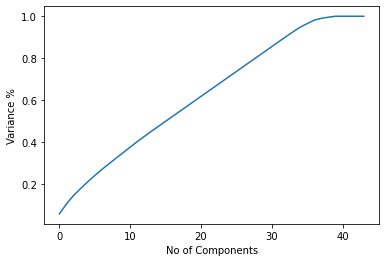

In [133]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(df_ss)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

In [134]:
pca.explained_variance_ratio_

array([5.85261060e-02, 4.81468309e-02, 3.96445049e-02, 3.32746537e-02,
       3.19385106e-02, 3.01058586e-02, 2.87518895e-02, 2.68755482e-02,
       2.65568843e-02, 2.65193032e-02, 2.63311156e-02, 2.61808393e-02,
       2.50500171e-02, 2.42817520e-02, 2.37769054e-02, 2.37210860e-02,
       2.37209100e-02, 2.37209100e-02, 2.37209100e-02, 2.37209100e-02,
       2.37208653e-02, 2.37203357e-02, 2.37198698e-02, 2.37192499e-02,
       2.37189574e-02, 2.37187004e-02, 2.37186353e-02, 2.37170674e-02,
       2.37128250e-02, 2.37035131e-02, 2.36923366e-02, 2.36584125e-02,
       2.35710270e-02, 2.29047248e-02, 2.20923716e-02, 1.71845885e-02,
       1.65939525e-02, 8.67185377e-03, 5.29187732e-03, 4.60339104e-03,
       2.16619500e-32, 1.49646549e-32, 9.47471373e-33, 3.18052586e-34])

In [135]:
12/13

0.9230769230769231

In [136]:
clf = PCA(0.9231)

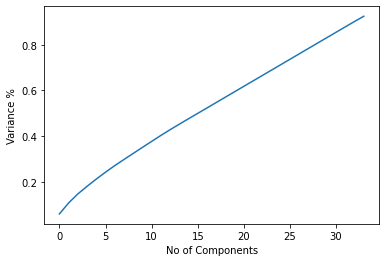

In [137]:
PrincipalComponents = clf.fit_transform(df_ss)
plt.figure()
plt.plot(np.cumsum(clf.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

In [138]:
clf.explained_variance_ratio_

array([0.05852611, 0.04814683, 0.0396445 , 0.03327465, 0.03193851,
       0.03010586, 0.02875189, 0.02687555, 0.02655688, 0.0265193 ,
       0.02633112, 0.02618084, 0.02505002, 0.02428175, 0.02377691,
       0.02372109, 0.02372091, 0.02372091, 0.02372091, 0.02372091,
       0.02372087, 0.02372034, 0.02371987, 0.02371925, 0.02371896,
       0.0237187 , 0.02371864, 0.02371707, 0.02371282, 0.02370351,
       0.02369234, 0.02365841, 0.02357103, 0.02290472])

In [139]:
clf.inverse_transform(PrincipalComponents)

array([[-0.26991069,  0.56731644, -0.25359614, ..., -0.4877845 ,
        -0.40077744,  2.46391239],
       [-0.15383664,  0.95271558,  0.60089589, ..., -0.410557  ,
        -0.32613228,  2.3855112 ],
       [-0.28448526, -1.63965493, -0.79545014, ...,  2.42114529,
        -0.41750268, -0.43397395],
       ...,
       [-0.17910807, -0.70948878, -0.54812867, ..., -0.4204008 ,
        -0.35792935,  2.4449521 ],
       [-0.44491839, -0.09170211,  0.77525824, ...,  2.34754669,
        -0.43146675, -0.41480251],
       [-0.1502492 ,  1.43018913, -0.4715369 , ..., -0.45815716,
        -0.38190167,  2.45768856]])